# To perform linear regression on a medical price dataset

### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

### Implementation of Linear Regression Methods
 Arguments, x_train (the features) and y_train (the output)

In [2]:
class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, x_train, y_train):
        # Add a column of ones to x_train for the bias term
        x_train = np.c_[np.ones((len(x_train), 1)), x_train]

        # Calculate the weights using the normal equation
        self.weights = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)

    def predict(self, x_test):
        # Add a column of ones to x_test for the bias term
        x_test = np.c_[np.ones((len(x_test), 1)), x_test]

        # Make predictions using the trained model
        y_pred = x_test.dot(self.weights)

        return y_pred

    def linear_regression(self,x_train, y_train):
      # Add a column of ones to x_train for the bias term
      x_train = np.c_[np.ones((len(x_train), 1)), x_train]

      # Calculate the weights using the normal equation
      weights = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)

      # Make predictions using the trained model
      y_pred = x_train.dot(weights)

      # Plot the training data and the fitted line
      plt.scatter(x_train[:, 1], y_train)
      plt.plot(x_train[:, 1], y_pred, 'r-')
      plt.xlabel('x_train')
      plt.ylabel('y_train')
      plt.title('Linear Regression')
      plt.show()

      # Return the weights
      return weights

    

### Load and Explore Data
Load your medical price dataset into a pandas DataFrame and explore its structure and contents.

In [3]:
# Load the medical prices dataset
data = pd.read_csv('/content/Medical Price Dataset.csv')

Ensure that your dataset includes both the dependent variable (price) and independent variables (factors influencing the price).

### Prepare the Data
 Separate the dependent variable (price) from the independent variables. Also, check for any missing values or categorical variables that need encoding.

In [4]:
# Encode categorical variables using one-hot encoding
encoded_data = pd.get_dummies(data, columns=['sex', 'smoker'])

# Normalize numerical features using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(encoded_data[['age', 'bmi']])


In [5]:
# Create a DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=['age', 'bmi'])

# Concatenate the scaled features and encoded categorical variables
preprocessed_data = pd.concat([scaled_data, encoded_data[['sex_male', 'sex_female', 'smoker_no', 'smoker_yes']]], axis=1)


### Split the Data
 Split the dataset into training and testing sets. This allows you to train the linear regression model on a portion of the data and evaluate its performance on unseen data.

In [6]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(preprocessed_data, data['charges'], test_size=0.2, random_state=42)

### Train the Model
Create an instance of the LinearRegression model and fit it to the training data.

In [7]:
# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


### Evaluate the Model
Once the model is trained, evaluate its performance by making predictions on the test data and calculating metrics such as mean squared error (MSE) and coefficient of determination (R^2).

In [8]:
# Assuming you already have the y_test and y_pred arrays

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate Coefficient of Determination (R^2)
r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R^2):', r2)

Mean Squared Error (MSE): 727152111.7607307
Coefficient of Determination (R^2): -3.6837877821839857


### To visualize 
The predicted values versus the actual values. Here's an example of how you can visualize the model outputs using a scatter plot

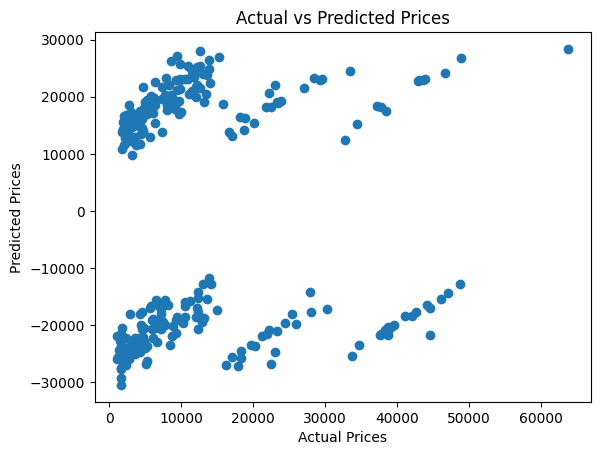

In [9]:
import matplotlib.pyplot as plt

# Assuming you have already trained the linear regression model and obtained y_test and y_pred

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()